# Análise temporal

In [208]:
import pandas as pd
import numpy as np

from dateutil import parser
from datetime import datetime

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller


# Series estacionárias
* A média da série não deve ser uma função do tempo, e sim uma constante. 
* Quando uma série temporal é estacionária, pode ser mais fácil modelar. 

## Análise gráfica
* Série mostrando observação de nascimento de aves
* Série mostrando quantidade de passageiros por mês em uma cia área

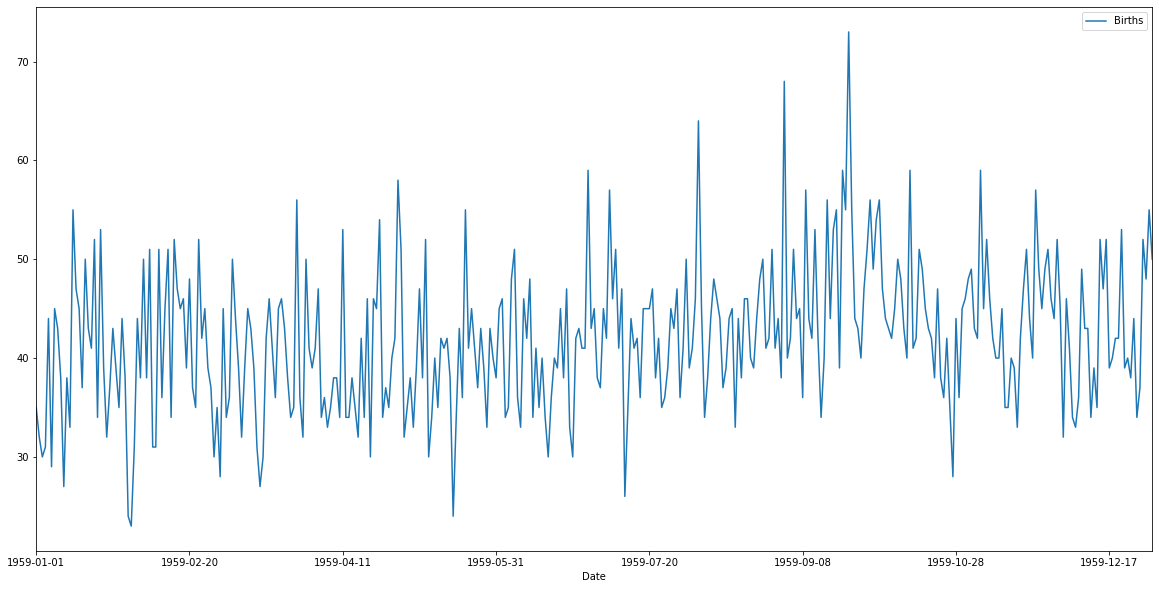

In [199]:
birds = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0)
birds.plot(figsize=(20,10))

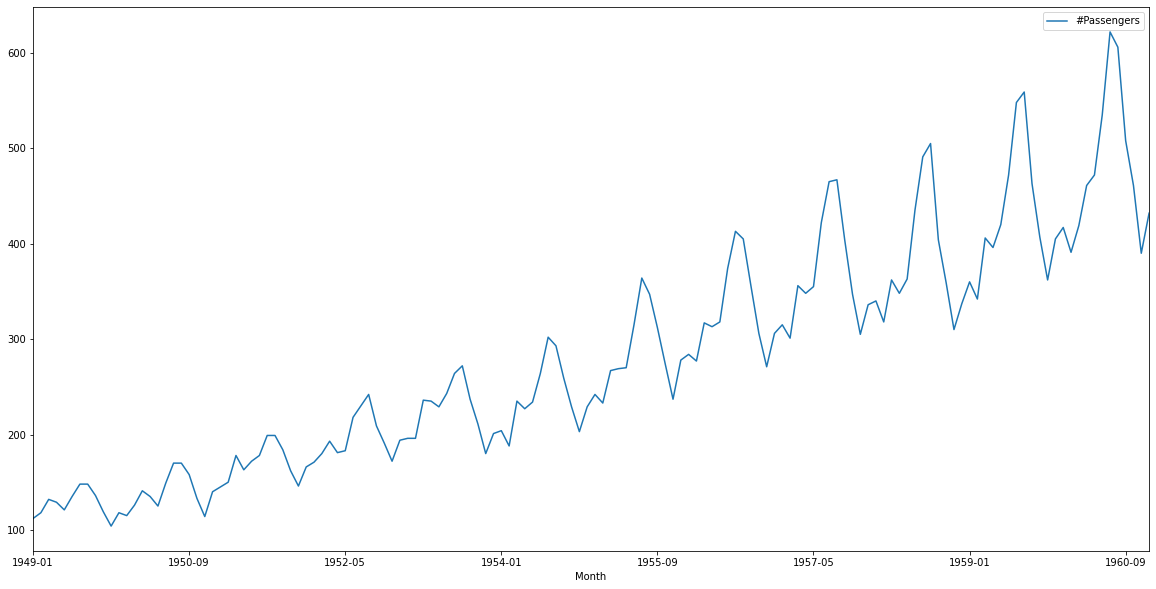

In [200]:
airPassagers = pd.read_csv('AirPassengers.csv', header=0, index_col=0)
airPassagers.plot(figsize=(20,10))

* A distribuição de nascimento de aves se mostra constante ao passar do tempo
* A distribuição de passageiros mostra duas características claras de não-estacionaridade
    * tendência: número crescente de passageiros
    * repetições de padrões em períodos específicos: meses de férias apresentam um pico de passageiros

## Estatistica Resumida

* Segmentando a série temporal in partições menores e comparando a média e variância de cada grupo
* Se a diferença é significativa a série é não-estacionária

* A seguir comparamos o histograma das duas séries

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65d52810d0>]],
      dtype=object)

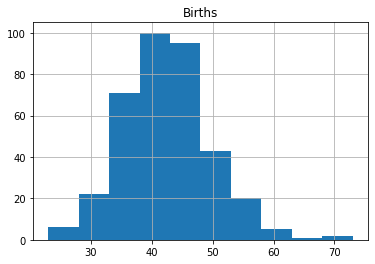

In [153]:
birds.hist()

## Obtendo média e variância de duas partes distinstas da série

In [155]:
X = birds.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('media 1=%f, media 2=%f' % (mean1, mean2))
print('variancia 1=%f, variancia 2=%f' % (var1, var2))

mean1=39.763736, mean2=44.185792
variance1=49.213410, variance2=48.708651


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65d509b310>]],
      dtype=object)

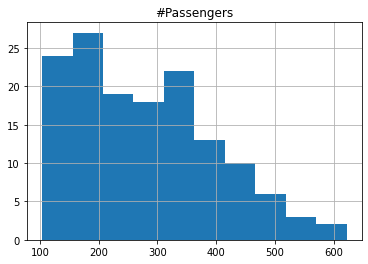

In [159]:
airPassagers.hist()

## Obtendo média e variância de duas partes distintas da série

In [161]:
X = airPassagers.values
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('media 1=%f, media 2=%f' % (mean1, mean2))
print('variancia 1=%f, variancia 2=%f' % (var1, var2))

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


## Alterando a base de cia área para base log (alteração de escala)

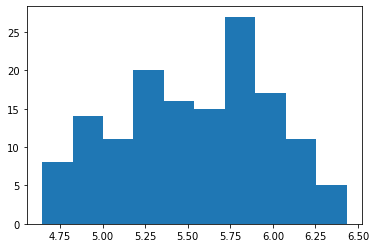

In [162]:
X = airPassagers.values
X = log(X)
plt.hist(X)
plt.show()

In [163]:
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('media 1=%f, media 2=%f' % (mean1, mean2))
print('variancia 1=%f, variancia 2=%f' % (var1, var2))

mean1=5.175146, mean2=5.909206
variance1=0.068375, variance2=0.049264


## Comparando resultado da avaliação estatística

* Dados de nascimento de aves
    * A média e variância das observações mostra um comportamente similar , rementendo a distribuição gaussiana 
    * Visualmente o histograma também reflete tal similaridade
* Dados de passageiros de avião
    * Para esse dataset a conclusão é que a distribuição é dependente no tempo, mostrando que é não-estacionária
* Dados de passageiros de avião (escala log)
    * Para esse dataset a curva fica bem próxima da gaussiana, e os números também mostram essa relação

# Teste Estatístico

* testes estatísticos são mais confiáveis para classisficar uma série com estacionária ou não-estacionária

## Teste Dickey-Fuller
* O teste Dickey-Fuller aumentado é um tipo de teste estatístico chamado teste de raiz unitária.

* A intuição por trás de um teste de raiz unitária é que ela determina com que intensidade uma série temporal é definida por uma tendência.


* A hipótese nula do teste é que a série temporal pode ser representada por uma raiz unitária, que não é estacionária (possui alguma estrutura dependente do tempo). 


* A hipótese alternativa (rejeitando a hipótese nula) é que a série temporal é estacionária.


* Nós interpretamos esse resultado usando o valor-p do teste. 
    * Um valor p abaixo de um limite (como 5% ou 1%) sugere que rejeitemos a hipótese nula (estacionária); 
    * caso contrário, um valor p acima do limiar sugere que falhamos em rejeitar a hipótese nula (não estacionária).
    * limiar 0,05
        * Valor p> 0,05: falha ao rejeitar a hipótese nula (H0), os dados têm uma raiz unitária e não são estacionários.
        * Valor de p <= 0,05: Rejeita a hipótese nula (H0), os dados não possuem uma raiz unitária e são estacionários.

## teste adfuller para base de aves

In [226]:
X = birds.values
result = adfuller(X)
print('ADF: %f' % result[0])
print('p-value: %f' % result[1])
print('valores criticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF: -4.808291
p-value: 0.000052
valores criticos:
	1%: -3.449
	5%: -2.870
	10%: -2.571


## teste adfuller para base cia aerea

In [227]:

X = airPassagers.values
result = adfuller(X)
print('ADF: %f' % result[0])
print('p-value: %f' % result[1])
print('valores criticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF: 0.815369
p-value: 0.991880
valores criticos:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## teste adfuller para base cia aerea (Escala Log)

In [228]:
X = airPassagers.values
X = np.log(X)
result = adfuller(X)
print('ADF: %f' % result[0])
print('p-value: %f' % result[1])
print('valores criticos:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF: -1.717017
p-value: 0.422367
valores criticos:
	1%: -3.482
	5%: -2.884
	10%: -2.579


## Teste adfuller mostra que a base é estacionária, mesmo alterando para escala log

## Funcionalidades do Python, Numpy e Pandas para manipular tipos de dados temporal
* Objeto primitivo para trabalhar com data e hora no python e Pandas (datetime)
* Funções diversas para trabalhar com data e hora (dateutil)
    * No exemplo abaixo parse de texto para objeto datetime

## Objeto datetime do python

In [209]:
from datetime import datetime
t=datetime(year=2015, month=7, day=4)
print(t)
print(type(t))

## Operacoes com datas
* Parser de data
* visualização parcial de data

In [29]:
from dateutil import parser
date = parser.parse("4th of July, 2015")
print(date)
date.strftime('%A')

2015-07-04 00:00:00


## Suporte do numpy para operação com datas

In [213]:
datenp = np.array('2015-07-04', dtype=np.datetime64)
print(datenp)
date = parser.parse("4th of July, 2015")
datenp = np.array('2015-07-04', dtype=np.datetime64)
print(date)
print(datenp)
print(type(date))
print(type(datenp))

2015-07-04
2015-07-04 00:00:00
2015-07-04
<class 'datetime.datetime'>
<class 'numpy.ndarray'>


## Criando novas datas usando função range

In [35]:
datenp + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

## Representacao de datas por nível de detalhe

In [219]:
dt=np.datetime64('2015-07-04 12:59:59.50', 'ns')
print(dt)
dt=np.datetime64('2015-07-04 12:59:59.50', 'as')
print(dt)
dt=np.datetime64('2015-07-04 12:59:59.50', 's')
print(dt)
dt=np.datetime64('2015-07-04 12:59:59.50', 'h')
print(dt)
dt=np.datetime64('2015-07-04 12:59:59.50', 'Y')
print(dt)

2015-07-04T12:59:59.500000000
1970-01-01T00:00:04.924576063353126912
2015-07-04T12:59:59
2015-07-04T12
2015


## Tabela de códigos de especificação de datas

Cód | Nível
----|-------
Y	| Year
M	| Month
W	| Week
D	| Day
h	| Hour
m	| Minute
s	| Second
ms	| Millisecond
us	| Microsecond
ns	| Nanosecond
ps	| Picosecond
fs	| Femtosecond
as	| Attosecond

## Pandas manipulação de dados temporais

* O Pandas implementa as funcionalidades do objetos mostrados
* Função to_datetime converte uma coluna para tipo timestamp

In [229]:
date = pd.to_datetime("4th of July, 2015")
date
date.strftime('%A')

'Saturday'

## Gerando dados temporais
* converte para o tipo timestamp de data do pandas to_timedelta

In [231]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None)

## Pandas permite que um objeto series (coluna do dataframe) seja indexado por data

In [232]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04',
                          '2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

## Slicing com datas

In [233]:
data['2014-07-04':'2015-07-04']


2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [234]:
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

## Filtrando apenas por ano com slicing

In [45]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

Estruturas de dados de séries temporais do Pandas

* Timestamps

* Period

* Timedelta


In [47]:
dates = pd.to_datetime([datetime(2015, 7, 3), '4th of July, 2015',
                       '2015-Jul-6', '07-07-2015', '20150708'])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [235]:
dates.to_period('D')

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]', freq='D')

## calcula diferenca entre datas

In [236]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

## Sequências regulares: pd.date_range ()

* funções para criação de sequências regulares de datas

* pd.date_range() recebe uma data inicial, final e uma quantidade opcional de valores a serem gerados on intervalo
* pd.period_range()  recebe uma data inicial, final e uma frequência: Mensal, semanal , etc
* pd.timedelta_range() 

* Exemplo com dias

In [50]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

* Exemplo com horas

In [51]:
pd.date_range('2015-07-03', periods=8, freq='H')

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H')

In [62]:
#gera 3 semanas
dt=pd.Series(pd.period_range('1/1/2011', freq='W', periods=3))
print(dt)

#gera 3 dias
dt=pd.Series(pd.period_range('1/1/2011', freq='D', periods=3))
print(dt)

#gera 3 horas
dt=pd.Series(pd.period_range('1/1/2011', freq='H', periods=3))
print(dt)

0    2010-12-27/2011-01-02
1    2011-01-03/2011-01-09
2    2011-01-10/2011-01-16
dtype: period[W-SUN]
0    2011-01-01
1    2011-01-02
2    2011-01-03
dtype: period[D]
0    2011-01-01 00:00
1    2011-01-01 01:00
2    2011-01-01 02:00
dtype: period[H]


# Manipulação de datasets de dados temporais

## Exemplo: Visualizando Contagens de Bicicleta em Seattle

* Fremont Bridge Seattle: sensor indutivo que contabiliza o número de bicicletas por hora
* O dataset e mais detalhes a respeito pode ser encontrado em: http://data.seattle.gov/
* Link direto para o dataset: https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k/data



In [7]:
data = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col='Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


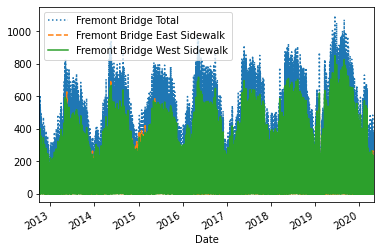

In [15]:
data.plot(style=[':', '--', '-'])

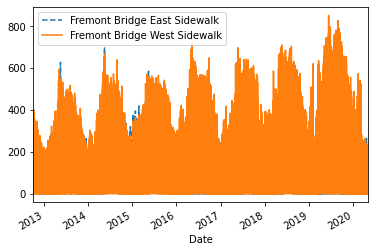

In [16]:
data[['Fremont Bridge East Sidewalk','Fremont Bridge West Sidewalk']].plot(style=[ '--', '-'])

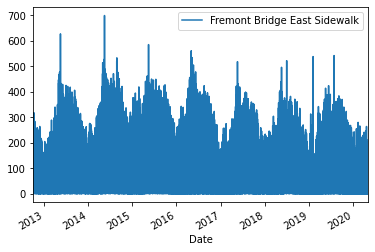

In [11]:
data[['Fremont Bridge East Sidewalk']].plot()

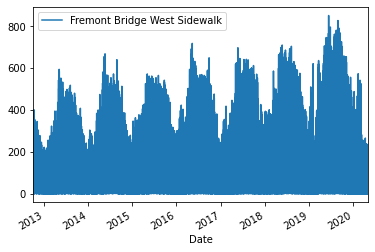

In [12]:
data[['Fremont Bridge West Sidewalk']].plot()

# Mudando frequência dos dados
* Originalmente os dados estão em média diária, mas podem ser transformados para média semanam, mensal, etc
* método resample

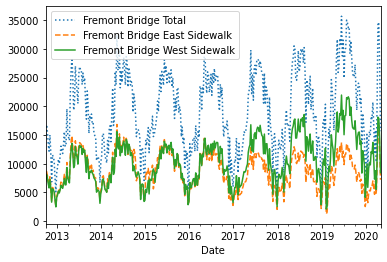

In [13]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])

## Agregando dados por intervalo de 30 dias
* usando função rolling

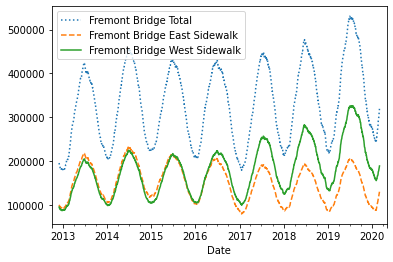

In [19]:
daily = data.resample('D').sum()
daily.rolling(120, center=True).sum().plot(style=[':', '--', '-'])

* A irregularidade do resultado é devida ao forte corte da janela. Podemos obter uma versão mais suave de uma média móvel usando uma função de janela 
*  por exemplo, uma janela gaussiana. 
* O código a seguir especifica a largura da janela (escolhemos 50 dias) 
* largura do gaussiano dentro da janela (escolhemos 10 dias):

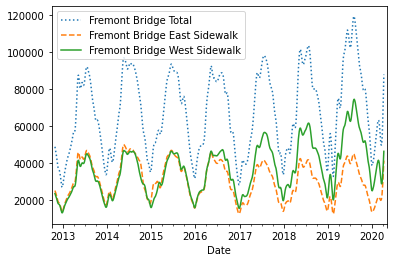

In [20]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

## Agrupando dados
* Obtendo uma visão de tráfego por hora do dia


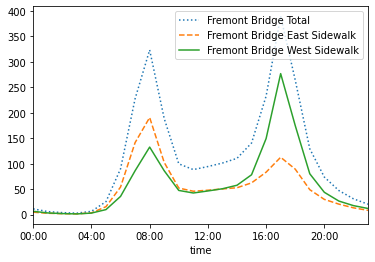

In [22]:
import numpy as np

by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);


## Agrupando por dia da semana

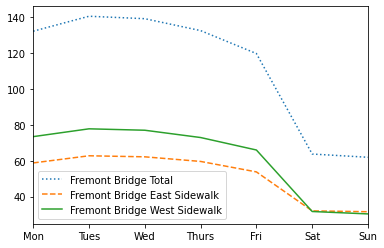

In [23]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);


In [25]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')
by_time = data.groupby([weekend, data.index.time]).mean()


/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  """


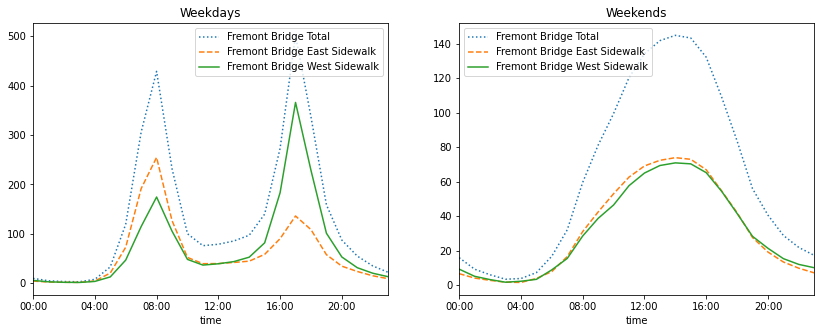

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
by_time.ix['Weekday'].plot(ax=ax[0], title='Weekdays',
                           xticks=hourly_ticks, style=[':', '--', '-'])
by_time.ix['Weekend'].plot(ax=ax[1], title='Weekends',
                           xticks=hourly_ticks, style=[':', '--', '-']);